In [2]:
from modules.functions import test_run_iterations, run
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate Data, if not already there
def gen1():
    test_n = [5,10,15]
    for n in test_n:
        n_t = n/10
        zoomed_omega = []
        for x in range(20):
            for omega in np.arange(1.50, 1.99, 0.02):
                zoomed_omega.append(test_run_iterations(omega, n_t))
        zoomed_omega = np.array(zoomed_omega)
        np.save(f'./data/zoomed_omega{n_t}1.npy', zoomed_omega)

In [ ]:
x = np.arange(1.50, 1.99, 0.02)

try:
    zoomed_omega = np.load('./data/zoomed_omega1.01.npy')
    zoomed_omega2 = np.load('./data/zoomed_omega1.51.npy')
    zoomed_omega3 = np.load('./data/zoomed_omega0.51.npy')
except FileNotFoundError:
    gen1()
    zoomed_omega = np.load('./data/zoomed_omega1.01.npy')
    zoomed_omega2 = np.load('./data/zoomed_omega1.51.npy')
    zoomed_omega3 = np.load('./data/zoomed_omega0.51.npy')

zoomed_omega = np.array(zoomed_omega)
zoomed_omega2 = np.array(zoomed_omega2)
zoomed_omega3 = np.array(zoomed_omega3)

zoomed_omega = zoomed_omega.reshape(20, 25)
zoomed_omega2 = zoomed_omega2.reshape(20, 25)
zoomed_omega3 = zoomed_omega3.reshape(20, 25)

avr_omega = np.mean(zoomed_omega, axis=0)
avr_omega2 = np.mean(zoomed_omega2, axis=0)
avr_omega3 = np.mean(zoomed_omega3, axis=0)
plt.figure(figsize=(8,6))
plt.plot(x, avr_omega3, marker='o', label='eta=0.5')
plt.plot(x, avr_omega, marker='o', label='eta=1')
plt.plot(x, avr_omega2, marker='o', label=f'$\eta$=1.5')

std_dev = np.std(zoomed_omega, axis=0)
std_dev2 = np.std(zoomed_omega2, axis=0)
std_dev3 = np.std(zoomed_omega3, axis=0)
plt.fill_between(x, avr_omega3 - std_dev, avr_omega3 + std_dev, alpha=0.2)
plt.fill_between(x, avr_omega - std_dev, avr_omega + std_dev, alpha=0.2)
plt.fill_between(x, avr_omega2 - std_dev2, avr_omega2 + std_dev2, alpha=0.2)
# 
# plt.figure(figsize=(20,12))
plt.legend(fontsize=16)
plt.xlabel('Omega')
plt.ylabel('Iterations')
plt.title('Average number of iterations for different omega values', fontsize=20)
plt.grid()
plt.xlim(1.50, 1.94)
plt.ylim(0,20000)
plt.show()


In [ ]:
print(np.min(avr_omega))
print(np.min(avr_omega2))
print(np.min(avr_omega3))
print(x[np.argmin(avr_omega)])
print(x[np.argmin(avr_omega2)])
print(x[np.argmin(avr_omega3)])

In [ ]:
def gen2():
    test_n = [5,10,15]
    for n in test_n:
        n_t = n/10
        zoomed_omega = []
        for x in range(20):
            for omega in np.arange(1.80, 1.90, 0.005):
                zoomed_omega.append(test_run_iterations(omega, n_t))
        zoomed_omega = np.array(zoomed_omega)
        np.save(f'./data/zoomedz_omega{n_t}.npy', zoomed_omega)

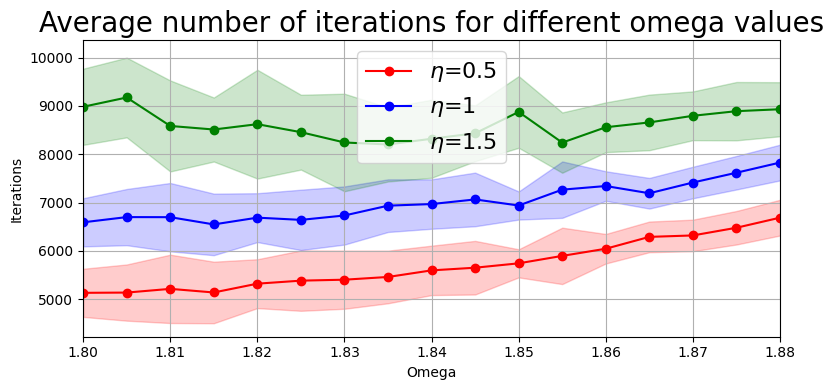

In [10]:
x = np.arange(1.80, 1.90, 0.005)
try:
    zoomed_omega = np.load('./data/zoomedz_omega1.0.npy')
    zoomed_omega2 = np.load('./data/zoomedz_omega1.5.npy')
    zoomed_omega3   = np.load('./data/zoomedz_omega0.5.npy')
except FileNotFoundError:
    gen2()
    zoomed_omega = np.load('./data/zoomedz_omega1.0.npy')
    zoomed_omega2 = np.load('./data/zoomedz_omega1.5.npy')
    zoomed_omega3 = np.load('./data/zoomedz_omega0.5.npy')

zoomed_omega = np.array(zoomed_omega)
zoomed_omega2 = np.array(zoomed_omega2)
zoomed_omega3 = np.array(zoomed_omega3)

zoomed_omega = zoomed_omega.reshape(20, 20)
zoomed_omega2 = zoomed_omega2.reshape(20, 20)
zoomed_omega3 = zoomed_omega3.reshape(20, 20)

avr_omega = np.mean(zoomed_omega, axis=0)
avr_omega2 = np.mean(zoomed_omega2, axis=0)
avr_omega3 = np.mean(zoomed_omega3, axis=0)

plt.figure(figsize=(8,4))
plt.plot(x, avr_omega3, marker='o', label='$\eta$=0.5', color='red')
plt.plot(x, avr_omega, marker='o', label=f'$\eta$=1', color='blue')
plt.plot(x, avr_omega2, marker='o', label=f'$\eta$=1.5', color='green')

std_dev = np.std(zoomed_omega, axis=0)
std_dev2 = np.std(zoomed_omega2, axis=0)
std_dev3 = np.std(zoomed_omega3, axis=0)
plt.fill_between(x, avr_omega3 - std_dev, avr_omega3 + std_dev, alpha=0.2, color='red')
plt.fill_between(x, avr_omega - std_dev, avr_omega + std_dev, alpha=0.2, color='blue')
plt.fill_between(x, avr_omega2 - std_dev2, avr_omega2 + std_dev2, alpha=0.2, color='green')



plt.legend(fontsize=16)
plt.xlabel('Omega')

plt.ylabel('Iterations')
plt.title('Average number of iterations for different omega values', fontsize=20)
plt.tight_layout()
plt.grid()
plt.xlim(1.80, 1.88)
plt.show()


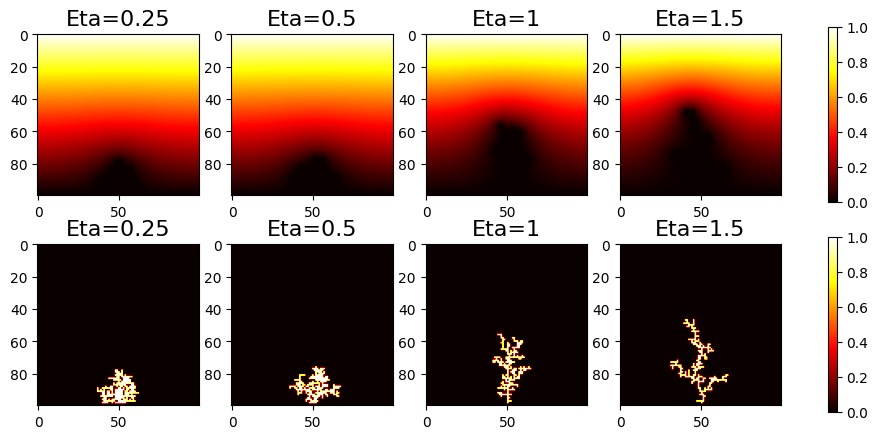

In [15]:
omega = 1.85

def gen3():
    domain_list= []
    contour_list = []
    for eta in [0.25, 0.5, 1, 1.5]:
        domain, contour = run(omega, eta)
        domain_list.append(domain)
        contour_list.append(contour)

    # save the domain and contour
    np.save('./data/domain_list.npy', domain_list)
    np.save('./data/contour_list.npy', contour_list)

gen3()
try:
    domain_list = np.load('./data/domain_list.npy')
    contour_list = np.load('./data/contour_list.npy')
except FileNotFoundError:
    domain_list = np.load('./data/domain_list.npy')
    contour_list = np.load('./data/contour_list.npy')

# plot the domain and contour in subfigures
fig, axs = plt.subplots(2, 4, figsize=(12,5))
for i in range(4):
    axs[0, i].imshow(domain_list[i], cmap='hot')
    axs[0, i].set_title(f'Eta={ [0.25, 0.5, 1, 1.5][i]}', fontsize=16)
    # where contour is 2 is zero
    contour_list[i][contour_list[i] == 2] = 0 
    axs[1, i].imshow(contour_list[i], cmap='hot')
    axs[1, i].set_title(f'Eta={ [0.25, 0.5, 1, 1.5][i]}', fontsize=16)

# add colorbar to the right of the subplots
plt.colorbar(axs[0, 0].imshow(domain_list[0], cmap='hot'), ax=axs[0, :], location='right')
plt.colorbar(axs[1, 0].imshow(contour_list[0], cmap='hot'), ax=axs[1, :], location='right')
plt.show()


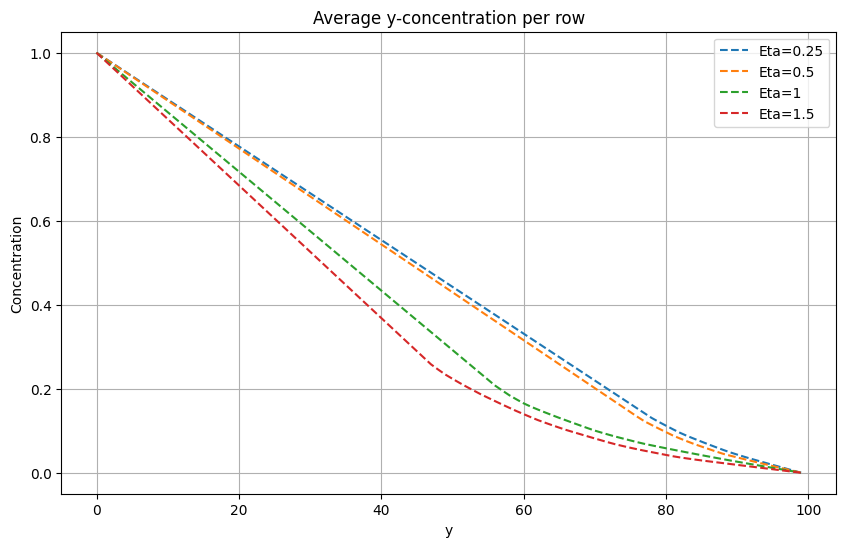

In [16]:
# plot the avr y-concentration per plot
# load
domain_list = np.load('./data/domain_list.npy', allow_pickle=True)
contour_list = np.load('./data/contour_list.npy', allow_pickle=True)

# calculate the average y-concentration per row and plot in one plot
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(4):
    y_concentration = np.mean(domain_list[i], axis=1)
    plt.plot(y_concentration, label=f'Eta={ [0.25, 0.5, 1, 1.5][i]}',linestyle='--')
plt.legend()
plt.xlabel('y')
plt.ylabel('Concentration')
plt.title('Average y-concentration per row')
plt.grid()
plt.show()
plt.show()